## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Dataset From Kaggle

In [2]:
dataset = pd.read_csv('final_cars_datasets.csv')

In [3]:
dataset

,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [4]:
dataset.columns

Index(['Unnamed: 0', 'price', 'mark', 'model', 'year', 'mileage',
       'engine_capacity', 'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

## Remove the first unnecessary column

In [5]:
dataset.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
dataset

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...
2313,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


# EDA

## Looking at various quantitative columns

In [7]:
dataset.describe()

,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,2005.972390,100013.194996,1507.010785
std,288.673112,3.698863,52512.478883,549.585170
min,80.000000,1979.000000,2000.000000,9.000000
25%,776.000000,2004.000000,67000.000000,1300.000000
50%,1000.000000,2006.000000,94000.000000,1490.000000
75%,1213.000000,2009.000000,124000.000000,1800.000000
max,1400.000000,2015.000000,790000.000000,12340.000000


## The Correlation Coefficient between various quantitative variables

In [8]:
dataset.corr()

,price,year,mileage,engine_capacity
price,1.000000,-0.211092,0.021581,0.173748
year,-0.211092,1.000000,0.086065,-0.142460
mileage,0.021581,0.086065,1.000000,0.130362
engine_capacity,0.173748,-0.142460,0.130362,1.000000


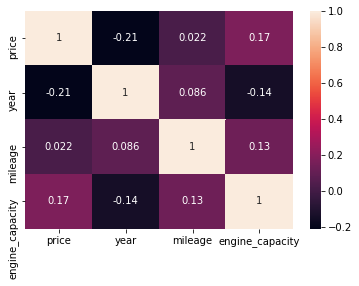

In [129]:
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Looks like the quantitative variables have weak relationship with price as the correlation coefficient are in between 0.0 and 0.3 

## Checking for Null Values

In [9]:
dataset.shape

(2318, 10)

In [10]:
dataset.isna().sum()

price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [11]:
dataset.isnull().sum()

price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

 # EDA

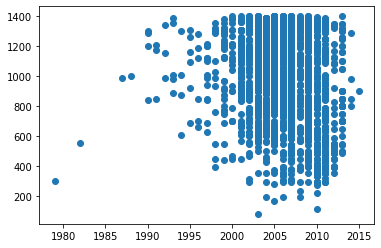

In [12]:
plt.scatter(dataset['year'],dataset['price'],marker='o')

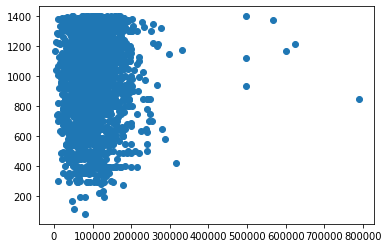

In [13]:
plt.scatter(dataset['mileage'],dataset['price'],marker='o')

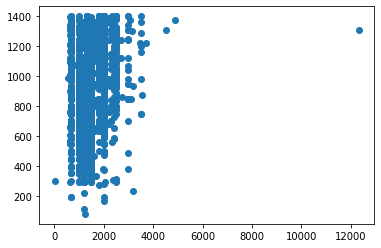

In [14]:
plt.scatter(dataset['engine_capacity'],dataset['price'],marker='o')

## Building a model only using the numerical columns

In [15]:
X = dataset[['engine_capacity','year','mileage']]
y = dataset[['price']]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
lr.coef_

array([[ 7.74679436e-02, -1.63449301e+01,  1.43230210e-06]])

In [20]:
lr.intercept_

array([33644.28840621])

In [21]:
result = lr.predict(X_test)

In [23]:
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Mean absolute error =", sklearn.metrics.mean_absolute_error(y_test, result)) 
print("Mean squared error =", sklearn.metrics.mean_squared_error(y_test,result)) 

Mean absolute error = 244.15153768501352
Mean squared error = 84591.20415375069


## EDA-2

In [24]:
dataset.columns

Index(['price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [25]:
dataset.dtypes

price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

## Finding Unique Value

In [26]:
for col in ['mark','model','transmission','drive','hand_drive','fuel']:
    print(f"{col} has values: {dataset[col].unique()}")

mark has values: ['nissan' 'toyota' 'daihatsu' 'volkswagen' 'mazda' 'honda' 'subaru'
 'mercedes-benz' 'kubota' 'mitsubishi' 'suzuki' 'bmw' 'chrysler' 'smart'
 'gm' 'opel' 'isuzu' 'land rover' 'peugeot' 'hyundai' 'kia motors' 'audi'
 'citroen' 'mitsuoka' 'volvo' 'ford' 'hino' 'jaguar']
model has values: ['march' 'lafesta' 'avensis' 'mira' 'passat' 'bongo van' 'step wgn'
 'sambar' 'inspire' 'mercedes-benz others' 'note' 'passo' 'impreza'
 'kubota others' 'life' 'progres' 'cube cubic' 'cube' 'a-class' 'coltplus'
 'mr wagon' 'pajero mini' 'fit' 'legacy b4' 'vitz' 'mark ii blit'
 'insight' 'move' 'tanto' 'terios kid' 'az-wagon' 'coo' 'verisa' 'swift'
 'delica d2' 'tiida' 'sienta' 'mini' 'colt' 'platz' 'bluebird sylphy'
 'eclipse' 'bb' 'moco' 'clipper truck' 'esse' 'ek wagon' 'polo' 'x-trail'
 'atenza sport' 'ad van' 'pixis space' 'freed spike' 'stream' 'alto'
 'raum' 'wish' 'every' 'demio' 'jimny' 'premacy' 'cr-v' 'lapin' 'delica'
 'wagon r' 'lancer' 'naked' 'odyssey' 'ractis' 'porte' 'coro

<AxesSubplot:xlabel='fuel', ylabel='price'>

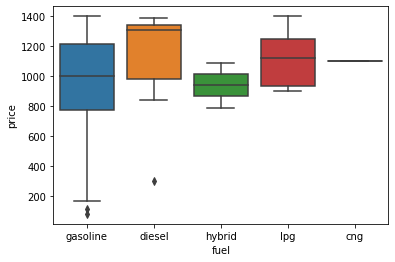

In [35]:
import seaborn as sns
sns.boxplot(x='fuel',y='price',data=dataset)

In [36]:
dataset[dataset['fuel']=='cng']

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
1393,1100,toyota,probox,2004,81516,1500,at,2wd,rhd,cng


<AxesSubplot:xlabel='hand_drive', ylabel='price'>

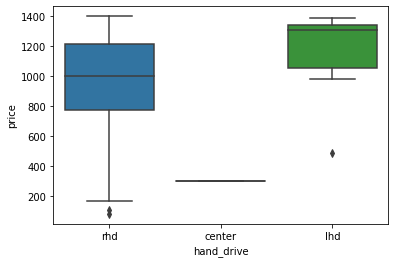

In [37]:
sns.boxplot(x='hand_drive',y='price',data=dataset)

In [38]:
dataset[dataset['hand_drive']=='center']

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
23,300,kubota,kubota others,1979,9999,9,mt,4wd,center,diesel


<AxesSubplot:xlabel='drive', ylabel='price'>

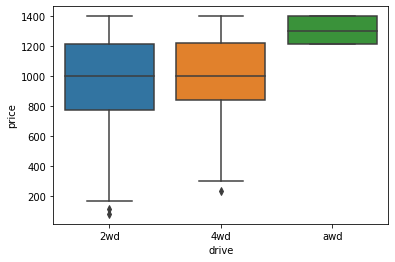

In [39]:
sns.boxplot(x='drive',y='price',data=dataset)

<AxesSubplot:xlabel='transmission', ylabel='price'>

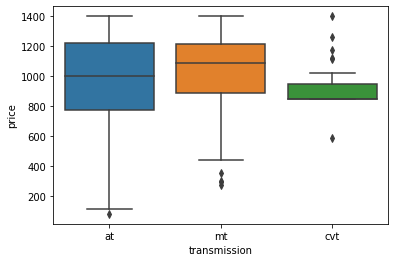

In [40]:
sns.boxplot(x='transmission',y='price',data=dataset)

<AxesSubplot:xlabel='mark', ylabel='price'>

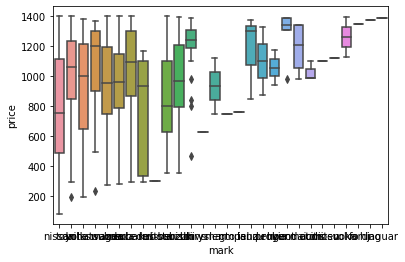

In [41]:
sns.boxplot(x='mark',y='price',data=dataset)

/home/prabesh013/Desktop/ml/ml_venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

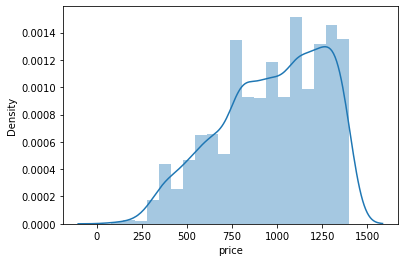

In [42]:
sns.distplot(dataset['price'])

## Applying One Hot Encoding for Categorical Variables

In [115]:
dataset_onehot = dataset.copy()
dataset_onehot.drop(columns = ['model','mark'],inplace=True,axis=1)
dataset_onehot = pd.get_dummies(dataset_onehot, columns=['transmission','drive','hand_drive','fuel'])
dataset_onehot.head()

,price,year,mileage,engine_capacity,transmission_at,transmission_cvt,transmission_mt,drive_2wd,drive_4wd,drive_awd,hand_drive_center,hand_drive_lhd,hand_drive_rhd,fuel_cng,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
0,80,2003,80000,1240,1,0,0,1,0,0,0,0,1,0,0,1,0,0
1,110,2010,53000,1200,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,165,2005,47690,2000,1,0,0,1,0,0,0,0,1,0,0,1,0,0
3,190,2008,130661,1990,1,0,0,1,0,0,0,0,1,0,0,1,0,0
4,190,2006,66300,660,1,0,0,1,0,0,0,0,1,0,0,1,0,0


In [116]:
print(dataset.shape)
print(dataset_onehot.shape)

(2318, 10)
(2318, 18)


Dimension increased while doing One Hot Encoding

In [117]:
dataset_onehot.describe()

,price,year,mileage,engine_capacity,transmission_at,transmission_cvt,transmission_mt,drive_2wd,drive_4wd,drive_awd,hand_drive_center,hand_drive_lhd,hand_drive_rhd,fuel_cng,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,2005.972390,100013.194996,1507.010785,0.936583,0.012942,0.050475,0.915013,0.082830,0.002157,0.000431,0.006903,0.992666,0.000431,0.007765,0.987921,0.000863,0.003020
std,288.673112,3.698863,52512.478883,549.585170,0.243764,0.113050,0.218969,0.278923,0.275685,0.046404,0.020770,0.082812,0.085342,0.020770,0.087797,0.109264,0.029367,0.054882
min,80.000000,1979.000000,2000.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,776.000000,2004.000000,67000.000000,1300.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1000.000000,2006.000000,94000.000000,1490.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1213.000000,2009.000000,124000.000000,1800.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1400.000000,2015.000000,790000.000000,12340.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


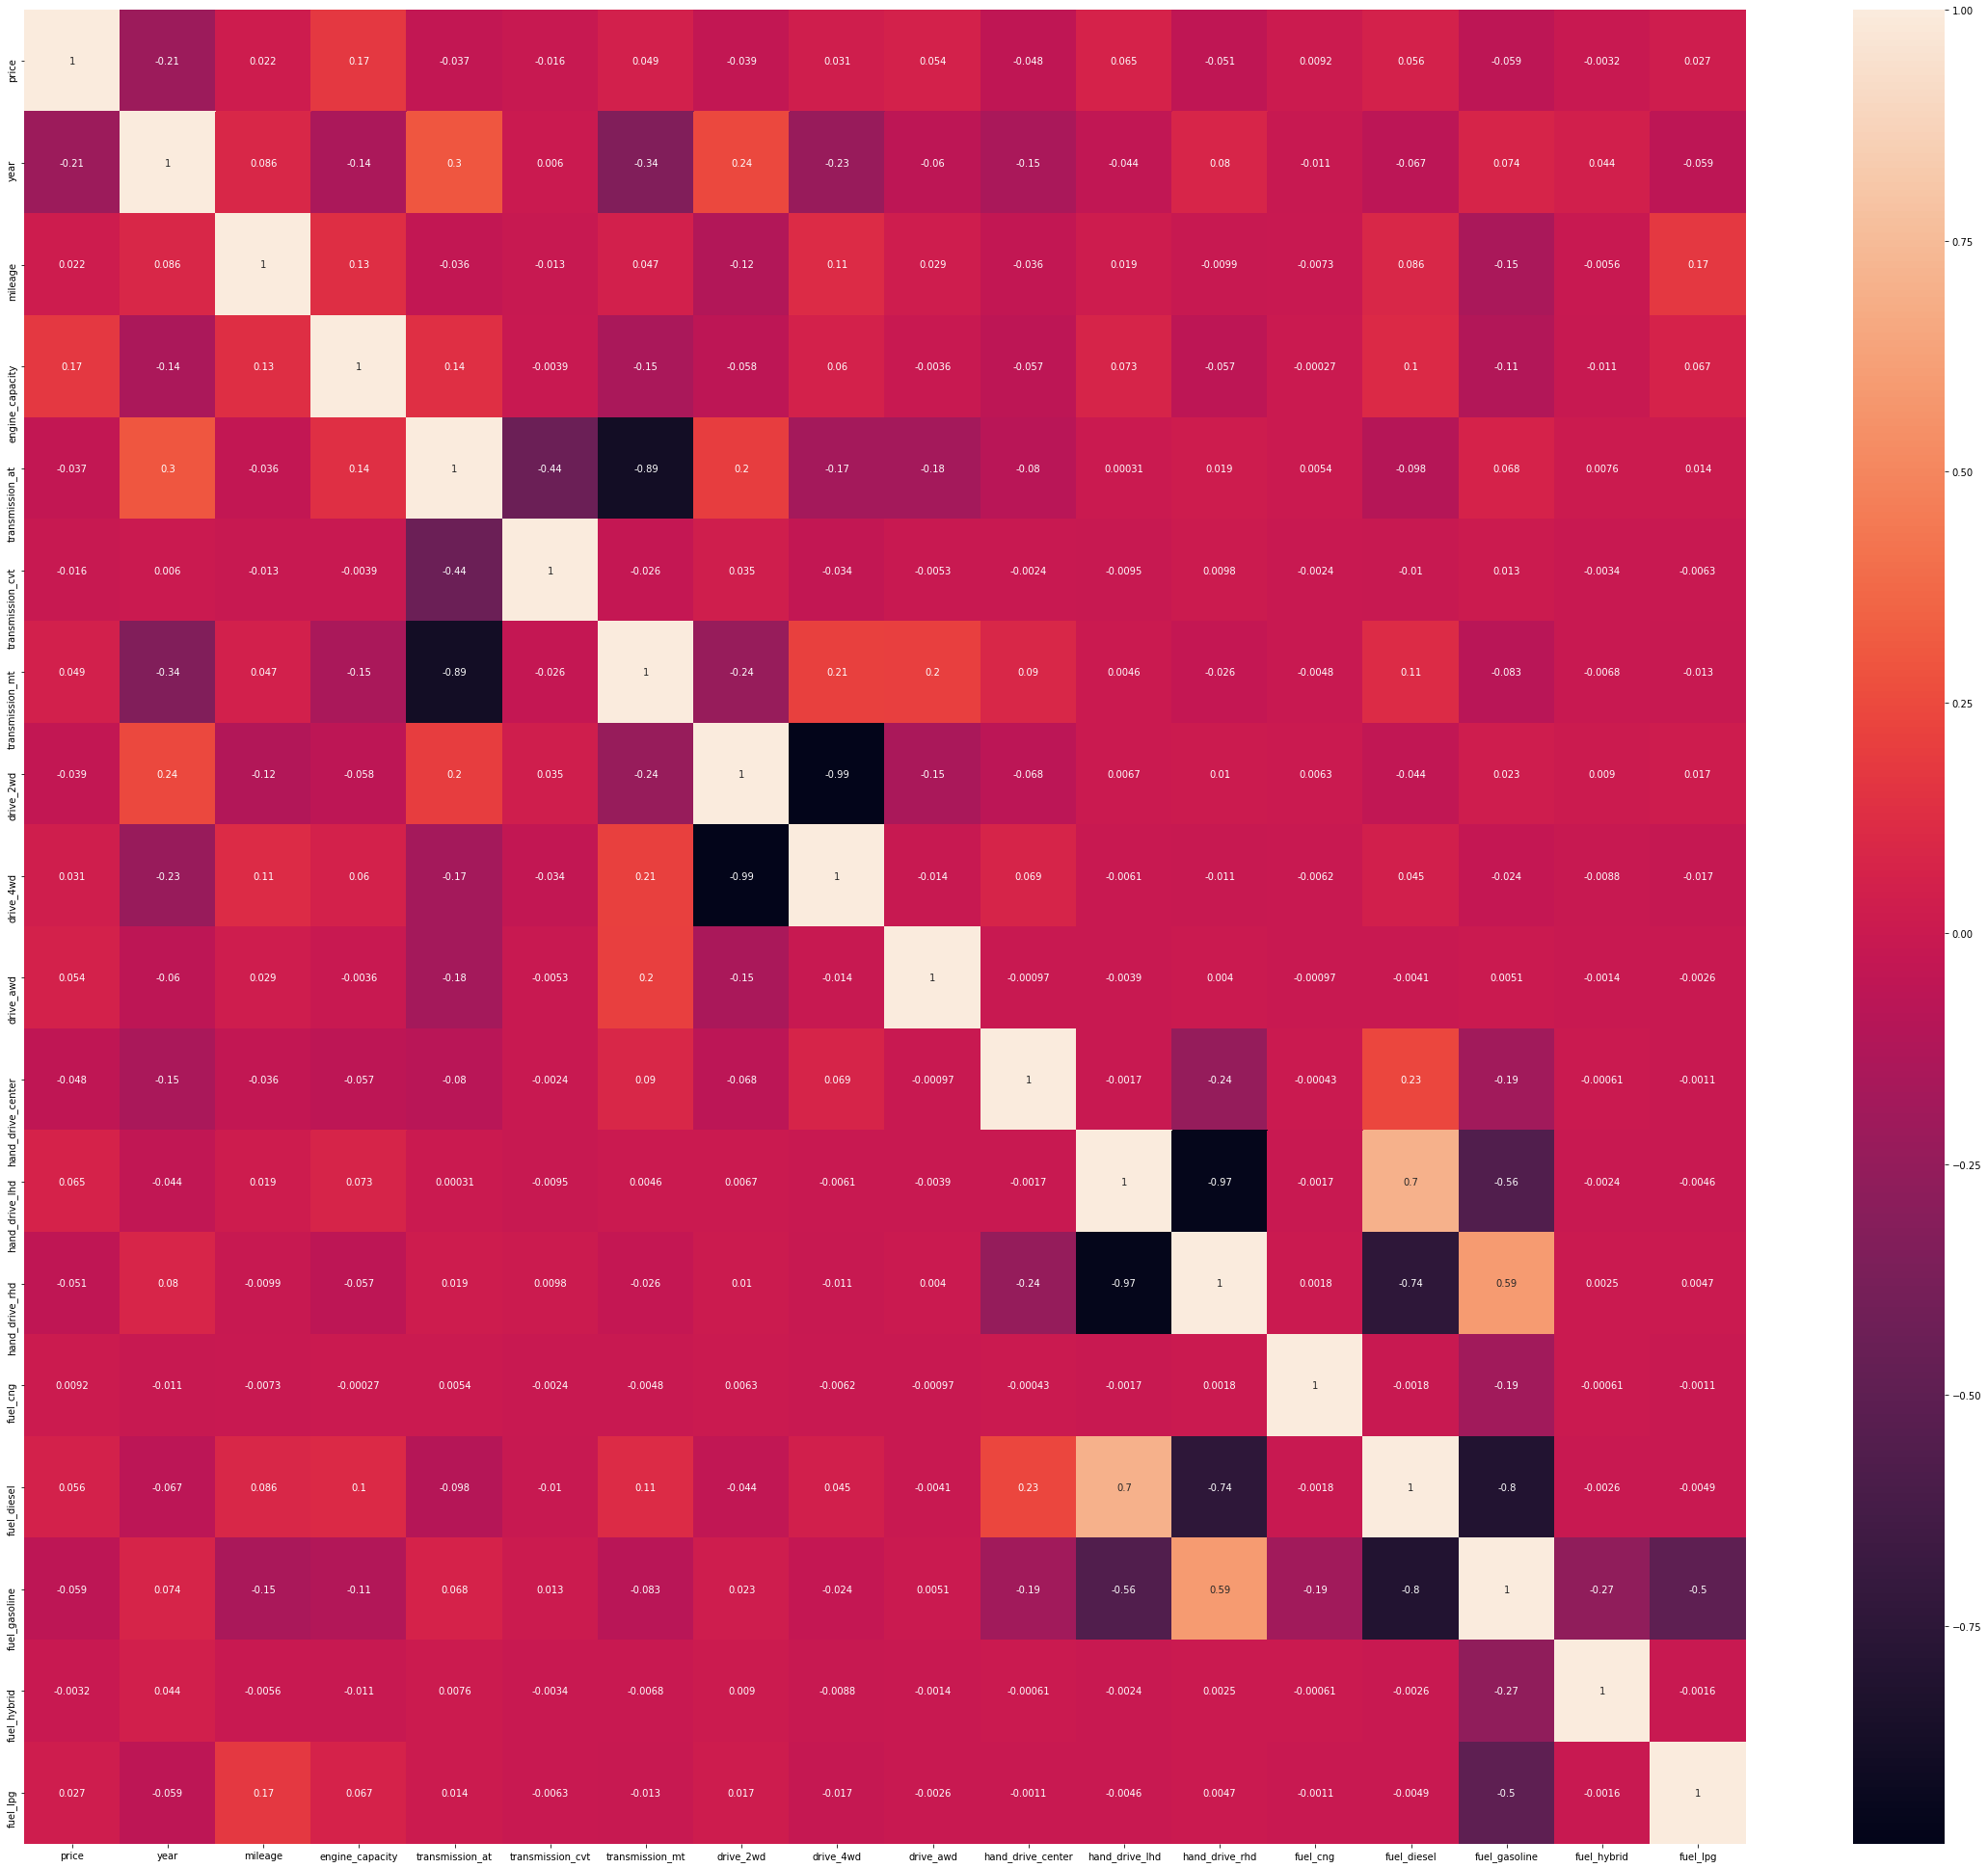

In [132]:
plt.figure(figsize = (40, 35))
corrMatrix = dataset_onehot.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [133]:
dataset_onehot.dtypes

price                int64
year                 int64
mileage              int64
engine_capacity      int64
transmission_at      uint8
transmission_cvt     uint8
transmission_mt      uint8
drive_2wd            uint8
drive_4wd            uint8
drive_awd            uint8
hand_drive_center    uint8
hand_drive_lhd       uint8
hand_drive_rhd       uint8
fuel_cng             uint8
fuel_diesel          uint8
fuel_gasoline        uint8
fuel_hybrid          uint8
fuel_lpg             uint8
dtype: object

In [134]:
X = dataset_onehot.iloc[:,1:]
y = dataset_onehot[['price']]

In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [136]:
lr2 = LinearRegression()

In [137]:
lr2.fit(X_train,y_train)

LinearRegression()

In [138]:
lr2.coef_

array([[-1.36233868e+01,  1.35259155e-04,  7.00046825e-02,
         1.62596094e+01, -3.40351249e+01,  1.77755155e+01,
        -1.00517395e+02, -9.90343560e+01,  1.99551751e+02,
        -6.85673049e+02,  4.51231990e+02,  2.34441059e+02,
         2.27755664e+01, -8.66436302e+01, -8.51090580e+01,
         1.39350129e+02,  9.62699259e+00]])

In [139]:
lr2.intercept_

array([28112.27553409])

In [140]:
result = lr2.predict(X_test)

In [141]:
print("Mean absolute error =", sklearn.metrics.mean_absolute_error(y_test, result)) 
print("Mean squared error =", sklearn.metrics.mean_squared_error(y_test,result)) 

Mean absolute error = 224.35011010529306
Mean squared error = 72240.74601124262
